In [ ]:
import os


In [ ]:
!pip install catboost

     |████████████████████████████████| 66.2MB 67kB/s 


In [ ]:
!pip install hyperopt

In [ ]:
!git clone https://github.com/hyperopt/hyperopt-sklearn.git

Cloning into 'hyperopt-sklearn'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 1214 (delta 6), reused 7 (delta 4), pack-reused 1201
Receiving objects: 100% (1214/1214), 2.02 MiB | 23.79 MiB/s, done.
Resolving deltas: 100% (741/741), done.


In [ ]:
os.chdir('/content/hyperopt-sklearn')

In [ ]:
pip install .

Processing /content/hyperopt-sklearn
     |████████████████████████████████| 163kB 2.8MB/s 
  Created wheel for hpsklearn: filename=hpsklearn-0.0.3-cp36-none-any.whl size=26799 sha256=6e7da0f23930fbda1990e7bd1959ee1b18178bb39b7e86c03fd687f61c08f094
  Stored in directory: /root/.cache/pip/wheels/1f/5c/17/d32b5ece02683e31bc11e46a750d938007cfc963dba1cbb56b
Successfully built hpsklearn


In [ ]:
os.chdir('/content/')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from hpsklearn import HyperoptEstimator
#from hpsklearn import any_classifier
#from hpsklearn import any_preprocessing
#from hyperopt import tpe
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

#Suppressing all warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
data_df = pd.read_csv('/content/drive/My Drive/heart_failure_dataset.csv')

Sex - Gender of patient Male = 1, Female =0
Age - Age of patient
Diabetes - 0 = No, 1 = Yes
Anaemia - 0 = No, 1 = Yes
High_blood_pressure - 0 = No, 1 = Yes
Smoking - 0 = No, 1 = Yes
DEATH_EVENT - 0 = No, 1 = Yes

In [ ]:
data_df.head()

,age,anaemia,creat_phos,diabetes,eject_fract,hbp,platelets,ser_creat,ser_sod,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


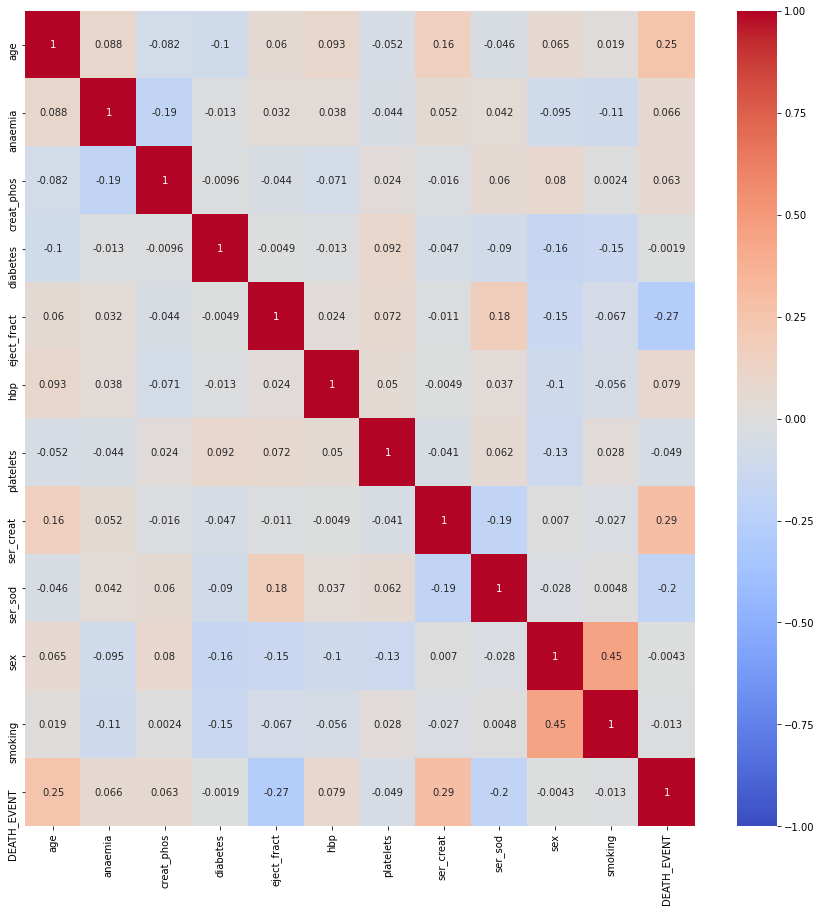

In [ ]:
corr = data_df.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [ ]:
X = data_df.drop(['DEATH_EVENT'], axis =1)
y = data_df['DEATH_EVENT']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=101)

In [ ]:
model = HyperoptEstimator(classifier = any_classifier('cla'),
                          preprocessing = any_preprocessing('pre'),
                          algo = tpe.suggest,
                          max_evals = 50,
                          trial_timeout = 30)

In [ ]:
model.fit(X_train, y_train)

  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)



  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)



  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)



  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)



  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)



  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)



100%|██████████| 1/1 [00:00<00:00,  1.86it/s, best loss: 0.1777777777777778]


In [ ]:
acc = model.score(X_test, y_test)

In [ ]:
print(f'The testing accuracy: {acc}')

The testing accuracy: 0.7333333333333333


In [ ]:
print(model.best_model())

{'learner': ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=230, n_jobs=1,
                     oob_score=False, random_state=2, verbose=False,
                     warm_start=False), 'preprocs': (), 'ex_preprocs': ()}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
nn = Sequential()
nn.add(Dense(128,activation='relu',input_shape=(7,)))
nn.add(Dropout(0.4))
nn.add(Dense(256,activation='relu'))
nn.add(Dropout(0.4))
nn.add(Dense(512,activation='relu'))
nn.add(Dropout(0.4))
nn.add(Dense(1024,activation='relu'))
nn.add(Dropout(0.4))
nn.add(Dense(512,activation='relu'))
nn.add(Dropout(0.4))
nn.add(Dense(256,activation='relu'))
nn.add(Dropout(0.4))
nn.add(Dense(128,activation='relu'))
nn.add(Dropout(0.4))
nn.add(Dense(1,activation='sigmoid'))

nn.compile(optimizer='adam',metrics=['acc'],loss='binary_crossentropy')

history = nn.fit(X_train,y_train,
                epochs=50,
                validation_data=(X_test,y_test)
                )

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import joblib

In [ ]:
models= [['Logistic Regression: ',LogisticRegression()],
        ['KNearest Neighbor: ',KNeighborsClassifier()],
        ['Decision Tree Classifier: ',DecisionTreeClassifier()],
        ['Random Forest Classifier: ',RandomForestClassifier()],
        ['Ada Boost: ',AdaBoostClassifier()],
        ['SVM: ',SVC()],
        ['XG Boost:',XGBClassifier()],
        ['Cat Boost',CatBoostClassifier(logging_level='Silent')]]

for name,model in models:
    model = model
    model.fit(X_train,y_train)

    # Save model
    filename = f'{name}_model.pkl'
    model_file = open(filename, "wb")
    joblib.dump(model, model_file)
    model_file.close()

    # Accuracy
    print(name)
    print('Validation Acuuracy: ',accuracy_score(y_test,model.predict(X_test)))
    print('Training Accuracy: ',accuracy_score(y_train,model.predict(X_train)))
    print('############################################')

Logistic Regression: 
Validation Acuuracy:  0.76
Training Accuracy:  0.71875
############################################
KNearest Neighbor: 
Validation Acuuracy:  0.72
Training Accuracy:  0.7321428571428571
############################################
Decision Tree Classifier: 
Validation Acuuracy:  0.7466666666666667
Training Accuracy:  1.0
############################################
Random Forest Classifier: 
Validation Acuuracy:  0.76
Training Accuracy:  1.0
############################################
Ada Boost: 
Validation Acuuracy:  0.76
Training Accuracy:  0.8571428571428571
############################################
SVM: 
Validation Acuuracy:  0.7333333333333333
Training Accuracy:  0.6607142857142857
############################################
XG Boost:
Validation Acuuracy:  0.7866666666666666
Training Accuracy:  0.9508928571428571
############################################
Cat Boost
Validation Acuuracy:  0.8
Training Accuracy:  0.9910714285714286
#######################

In [ ]:
data_df.columns

Index(['age', 'anaemia', 'creat_phos', 'diabetes', 'eject_fract', 'hbp',
       'platelets', 'ser_creat', 'ser_sod', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')